<a href="https://colab.research.google.com/github/d12eek/Data-Science/blob/main/Fds_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('/content/assign_1.xlsx')
print(df.to_string())

                       Company   Age  Salary       Place Country  Gender
0                          TCS  20.0     NaN     Chennai   India       0
1                      Infosys  30.0     NaN      Mumbai   India       0
2                          TCS  35.0  2300.0    Calcutta   India       0
3                      Infosys  40.0  3000.0       Delhi   India       0
4                          TCS  23.0  4000.0      Mumbai   India       0
5                      Infosys   NaN  5000.0    Calcutta   India       0
6                          TCS   NaN  6000.0     Chennai   India       1
7                      Infosys  23.0  7000.0      Mumbai   India       1
8                          TCS  34.0  8000.0    Calcutta   India       1
9                          CTS  45.0  9000.0       Delhi   India       0
10                         CTS  23.0     NaN      Mumbai   India       0
11                         CTS  34.0  1089.0    Calcutta   India       0
12                         CTS  45.0     NaN     Ch

In [ ]:
df.shape

(148, 6)

In [ ]:
df.isnull()

,Company,Age,Salary,Place,Country,Gender
0,False,False,True,False,False,False
1,False,False,True,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
143,False,False,False,False,False,False
144,False,False,False,False,False,False
145,False,False,False,False,False,False
146,False,False,False,False,False,False


In [ ]:
df['Salary'].mean()

5312.467741935484

In [ ]:
df['Age'].mean()

30.484615384615385

In [ ]:
df['Salary'] = df['Salary'].fillna(value=5312.0)
df['Age']= df['Age'].fillna(value=30)
df.bfill()
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5312.0,Chennai,India,0
1,Infosys,30.0,5312.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [ ]:
df.isnull().sum()

,0
Company,8
Age,0
Salary,0
Place,14
Country,0
Gender,0


In [ ]:
data = df.bfill()
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5312.0,Chennai,India,0
1,Infosys,30.0,5312.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [ ]:
df['Salary'].mean()


5312.391891891892

In [ ]:
df['Salary'].median()

5312.0

In [ ]:
df['Salary'].mode()

,Salary
0,5312.0


In [ ]:
df['Age'].mean()

30.425675675675677

In [ ]:
df['Age'].median()

31.0

In [ ]:
df['Age'].mode()

,Age
0,30.0


In [ ]:
df.describe()

,Age,Salary,Gender
count,148.000000,148.000000,148.000000
mean,30.425676,5312.391892,0.222973
std,10.396291,2354.305009,0.417654
min,0.000000,1089.000000,0.000000
25%,23.000000,3149.250000,0.000000
50%,31.000000,5312.000000,0.000000
75%,36.000000,7084.000000,0.000000
max,54.000000,9876.000000,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

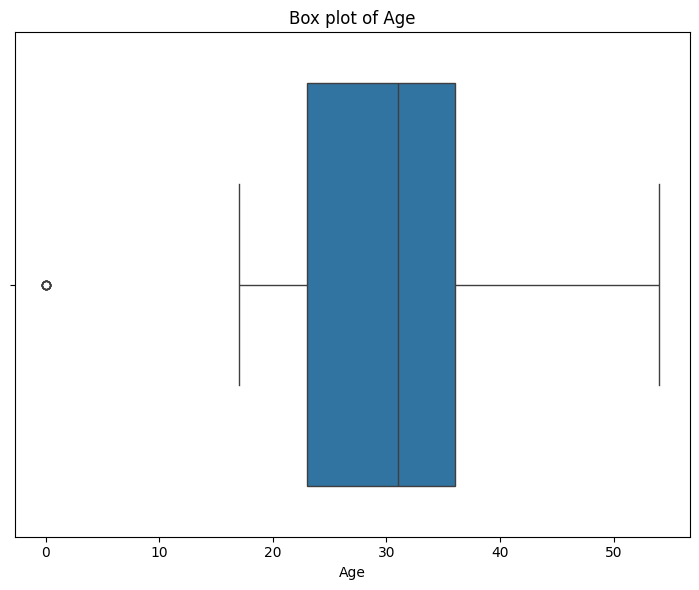

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x=df['Age'])
plt.title('Box plot of Age')
plt.tight_layout()
plt.show()


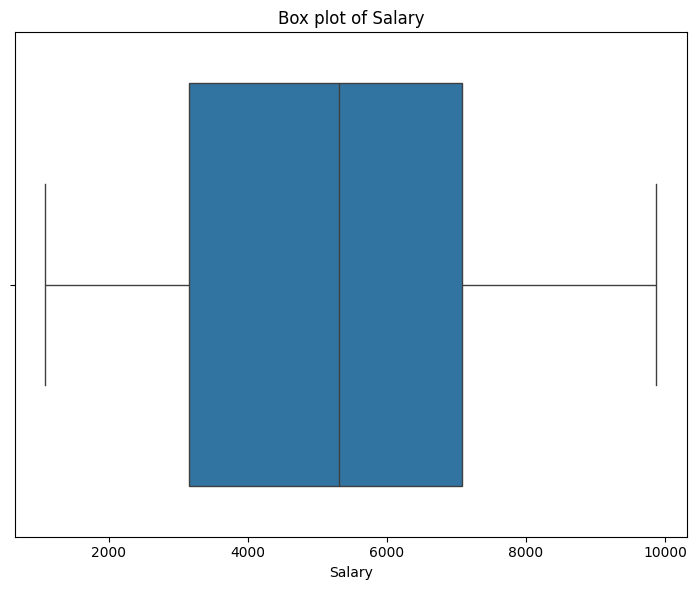

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x=df['Salary'])
plt.title('Box plot of Salary')
plt.tight_layout()
plt.show()

In [ ]:
def cap_outliers(df, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[column] = np.clip(df[column], lower_bound, upper_bound)

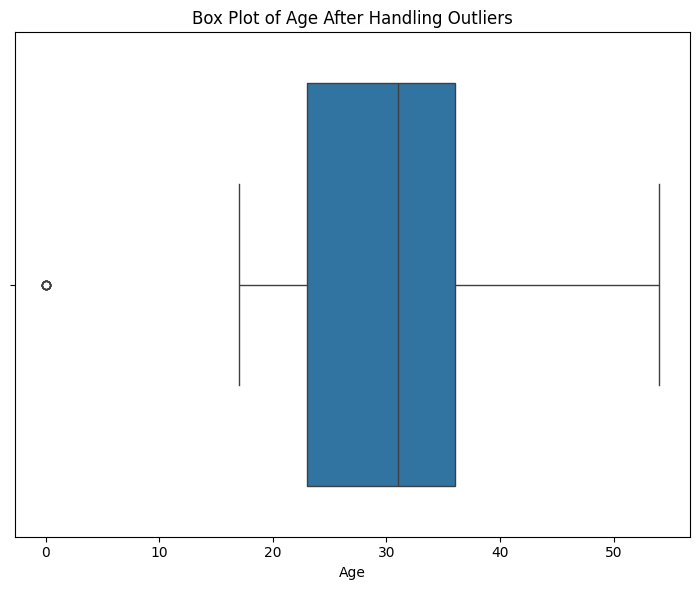

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age After Handling Outliers')
plt.tight_layout()
plt.show()

In [ ]:
# Handle Inconsistent Formatting
data['Country'] = data['Country'].str.upper()

# spaces and first letter capital
data['Company'] = data['Company'].str.strip().str.title()
data['Place'] = data['Place'].str.strip().str.title()
print(df[['Age', 'Salary']].describe())



# Remove duplicates
data.drop_duplicates(inplace=True)

# For consistency all values should be unique
print(data['Country'].unique())
print(data['Gender'].unique())
print(data['Company'].unique())
print(data['Place'].unique())

              Age       Salary
count  148.000000   148.000000
mean    30.425676  5312.391892
std     10.396291  2354.305009
min      0.000000  1089.000000
25%     23.000000  3149.250000
50%     31.000000  5312.000000
75%     36.000000  7084.000000
max     54.000000  9876.000000
['INDIA']
[0 1]
['Tcs' 'Infosys' 'Cts' 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']


In [ ]:
data['Company'] = data['Company'].str.strip()
data['Place'] = data['Place'].str.strip()

In [ ]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5312.0,Chennai,India,0
1,Infosys,30.0,5312.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [ ]:
print(df.describe())
print(df['Company'].value_counts())
print(df['Place'].value_counts())
print(df['Country'].value_counts())
print(df['Gender'].value_counts())

              Age       Salary      Gender
count  148.000000   148.000000  148.000000
mean    30.425676  5312.391892    0.222973
std     10.396291  2354.305009    0.417654
min      0.000000  1089.000000    0.000000
25%     23.000000  3149.250000    0.000000
50%     31.000000  5312.000000    0.000000
75%     36.000000  7084.000000    0.000000
max     54.000000  9876.000000    1.000000
Company
TCS                          53
Infosys                      45
CTS                          36
Tata Consultancy Services     2
Congnizant                    2
Infosys Pvt Lmt               2
Name: count, dtype: int64
Place
Mumbai        37
Calcutta      33
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64
Country
India    148
Name: count, dtype: int64
Gender
0    115
1     33
Name: count, dtype: int64


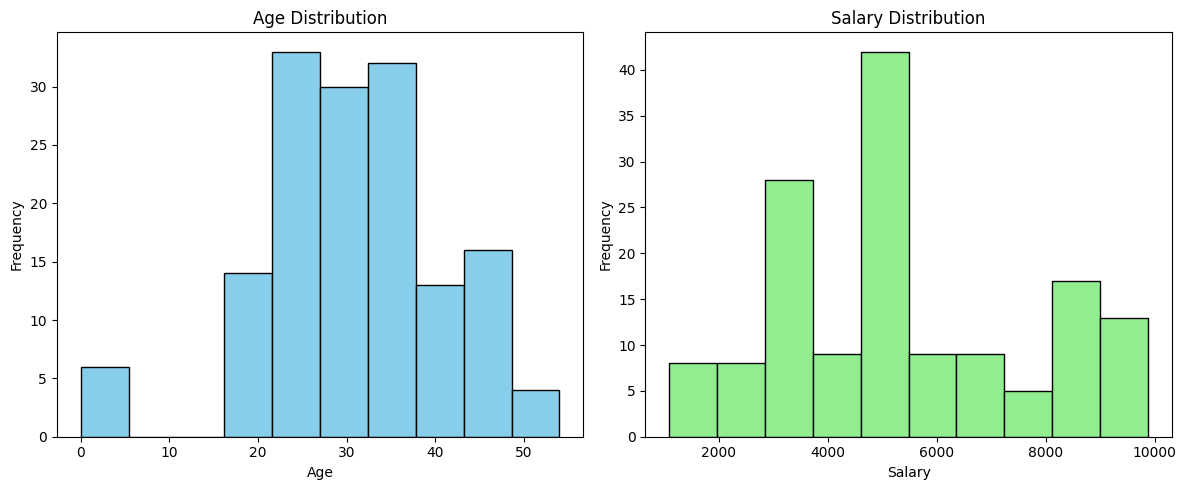

In [ ]:
# Histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(df['Salary'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


             Age    Salary
Age     1.000000  0.062359
Salary  0.062359  1.000000


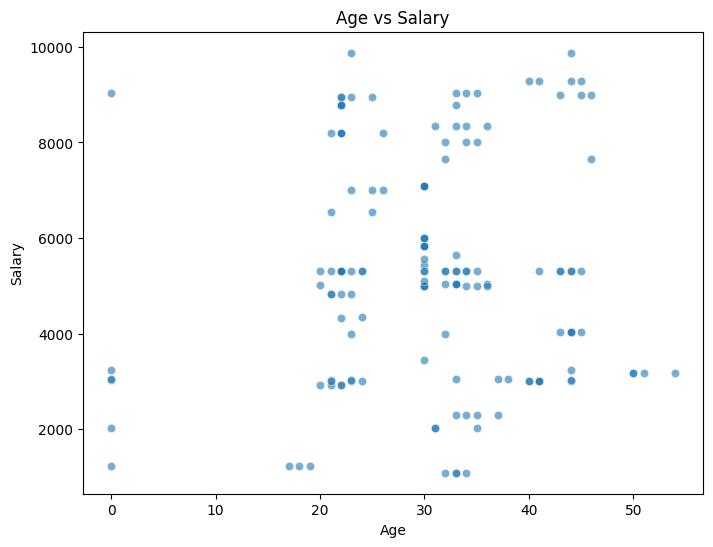

In [ ]:
# Correlation matrix
correlation_matrix = df[['Age', 'Salary']].corr()
print(correlation_matrix)
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', data=df, alpha=0.6)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()